In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from atlas_topq_2019_23_Limits import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 20)

In [5]:
recastData = pd.read_pickle('./pp2tt_formFactors_scan.pcl')
recastData = pd.read_pickle('./pp2tt_eft_scan.pcl')

In [6]:
recastData[['mST','mChi','yDM (95% C.L.)']]

,mST,mChi,yDM (95% C.L.)
0,300.0,5.0,1.414047
1,300.0,50.0,1.320802
2,300.0,100.0,1.236742
3,300.0,150.0,1.168760
4,300.0,200.0,1.088918
...,...,...,...
160,3000.0,2900.0,10.600763
161,3000.0,2925.0,10.771839
162,3000.0,2950.0,10.538830
163,3000.0,2975.0,10.545942


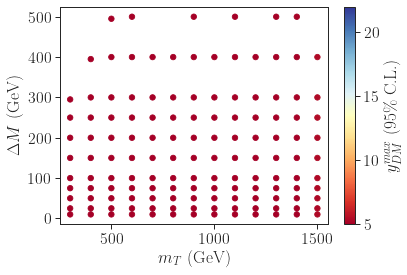

In [7]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

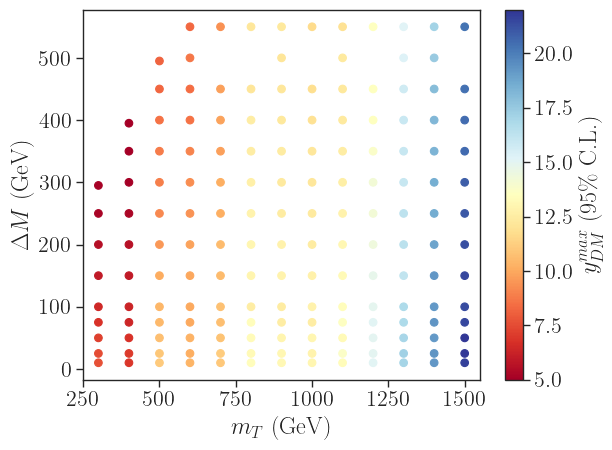

In [7]:
x = recastData0['mST']
y = recastData0['mChi']
dm = x-y
z = recastData0['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

In [29]:
red = recastData[0:1]

In [30]:
red

,model,mST,mChi,mT,yDM,process,xsec (pb),MC Events,file,bin_355_381,...,bin_549_633,bin_549_633_Error,bin_633_720,bin_633_720_Error,bin_720_836,bin_720_836_Error,bin_836_2000,bin_836_2000_Error,yDM (95% C.L.),$\Delta \chi^2$ (95% C.L.)
0,Top-EFTphysical_simple-UFO,300.0,5.0,172.5,1.0,$q q \to \bar{t} t$$g g \to \bar{t} t$,-0.000029,150000,../../processFolders/qq2tt_eft_scan/Events/run...,-0.000062,...,0.000073,0.000004,0.000073,0.000003,0.000069,0.000002,0.000119,0.000001,1.414047,3.84


In [31]:
# ### Load CMS data
xsecsObs,sm,covMatrix = read_ATLASdata()
# ### Load LO background from MG5
smLO = getSMLO()
# Get k-factor for each bin
kfac = getKfactor(sm,smLO)

In [32]:
binCols = [c for c in red.columns 
               if 'bin_' in c.lower() and not 'error' in c.lower()]
bins_left = np.array([eval(c.split('_')[1]) for c in binCols])
bins_right = np.array([eval(c.split('_')[2]) for c in binCols])               

In [33]:
signal = list(zip(bins_left,red.iloc[0][binCols].values))
signal = np.array(sorted(signal))[:,1]

In [34]:
signal = kfac*signal

In [35]:
signal = signal/bin_widths
sm = sm/bin_widths

In [41]:
yDMvals = np.linspace(0.,200.,200)
deltas = 0.2
c2 = np.array([chi2(y, signal, sm, xsecsObs, covMatrix, deltas) for y in yDMvals])

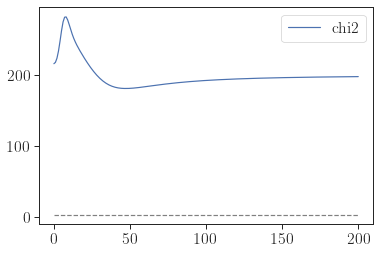

In [42]:
plt.plot(yDMvals,c2,label='chi2')
plt.hlines(y=3.84,xmin=yDMvals.min(),xmax=yDMvals.max(),linestyles='dashed',colors='gray')
# plt.vlines(x=yDM95,ymin=0,ymax=10.,linestyles='dashed',colors='gray')
# plt.vlines(x=yDM95b,ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.legend()
# plt.ylim(0,100)
plt.show()

In [44]:
sum(sm)/sum(np.abs(signal))

3040.8763957407486

In [ ]:
sum()